In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Problem 1: Linear Regression

## You are a part of an investment firm and your work is to do research about these 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company in investing consciously. Also, provide them with 5 attributes that are most important.

### 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. 

In [2]:
dff =pd.read_csv("Firm_level_data.csv")

In [3]:
dff.head(2).round(3)

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995,161.604,10,382.078,2.306,no,11.050,1625.454,80.27
1,1,407.754,122.101,2,0.000,1.860,no,0.844,243.117,59.02


In [4]:
dff.tail(2).round(3)

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
757,757,785.688,138.781,6,0.622,2.900,yes,1.625,309.939,61.39
758,758,22.702,14.245,5,18.574,0.197,no,2.213,18.940,7.50


In [5]:
#dropping first column -not important
dff.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
dff.head(2).round(3)

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995,161.604,10,382.078,2.306,no,11.050,1625.454,80.27
1,407.754,122.101,2,0.000,1.860,no,0.844,243.117,59.02


In [7]:
#rerranging the cloumns for better understanding and readibility for further analysis
dff = dff.reindex(columns=['institutions','randd','sp500','patents','employment','value', 'capital','sales'])

In [8]:
dff.head(2).round(3)

,institutions,randd,sp500,patents,employment,value,capital,sales
0,80.27,382.078,no,10,2.306,1625.454,161.604,826.995
1,59.02,0.000,no,2,1.860,243.117,122.101,407.754


In [9]:
#renaming the cloumns for better readibility and understanding
#creating a disctionary

dict = {'institutions': 'Instituions','randd': 'R&D_stocks', 'sp500': 'S&P500_index',
       'patents': 'Patents', 'employment':'Employment' ,'value': 'Stock_value', 'capital':'Capital_value', 'sales':'Sales' }
 
dff.rename(columns=dict,inplace=True)

In [10]:
dff.head(2).round(3)

,Instituions,R&D_stocks,S&P500_index,Patents,Employment,Stock_value,Capital_value,Sales
0,80.27,382.078,no,10,2.306,1625.454,161.604,826.995
1,59.02,0.000,no,2,1.860,243.117,122.101,407.754


In [11]:
print("no. of rows: ",dff.shape[0], "\n""no. of columns: ",dff.shape[1])

no. of rows:  759 
no. of columns:  8


In [12]:
#replacing object to integer type
dff["S&P500_index"]=dff["S&P500_index"].replace({'no': 0 , 'yes': 1})

In [13]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Instituions    759 non-null    float64
 1   R&D_stocks     759 non-null    float64
 2   S&P500_index   759 non-null    int64  
 3   Patents        759 non-null    int64  
 4   Employment     759 non-null    float64
 5   Stock_value    759 non-null    float64
 6   Capital_value  759 non-null    float64
 7   Sales          759 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 47.6 KB


In [14]:
dff.isnull().sum()

Instituions      0
R&D_stocks       0
S&P500_index     0
Patents          0
Employment       0
Stock_value      0
Capital_value    0
Sales            0
dtype: int64

- No null values

In [15]:
dup = dff.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

dff[dup]

Number of duplicate rows = 0


,Instituions,R&D_stocks,S&P500_index,Patents,Employment,Stock_value,Capital_value,Sales


In [16]:
dff.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Instituions,759.0,43.021,21.686,0.000,25.395,44.110,60.510,90.150
R&D_stocks,759.0,439.938,2007.398,0.000,4.628,36.864,143.253,30425.256
S&P500_index,759.0,0.286,0.452,0.000,0.000,0.000,1.000,1.000
Patents,759.0,25.831,97.260,0.000,1.000,3.000,11.500,1220.000
Employment,759.0,14.165,43.321,0.006,0.928,2.924,10.050,710.800
Stock_value,759.0,2732.735,7071.072,1.971,103.594,410.794,2054.160,95191.591
Capital_value,759.0,1977.747,6466.705,0.057,52.651,202.179,1075.790,93625.201
Sales,759.0,2689.705,8722.060,0.138,122.920,448.577,1822.547,135696.788


In [17]:
dff.skew()

Instituions      -0.168071
R&D_stocks       10.270483
S&P500_index      0.949540
Patents           7.766943
Employment        9.068875
Stock_value       6.075996
Capital_value     7.555091
Sales             9.219023
dtype: float64

### Univariate Analysis

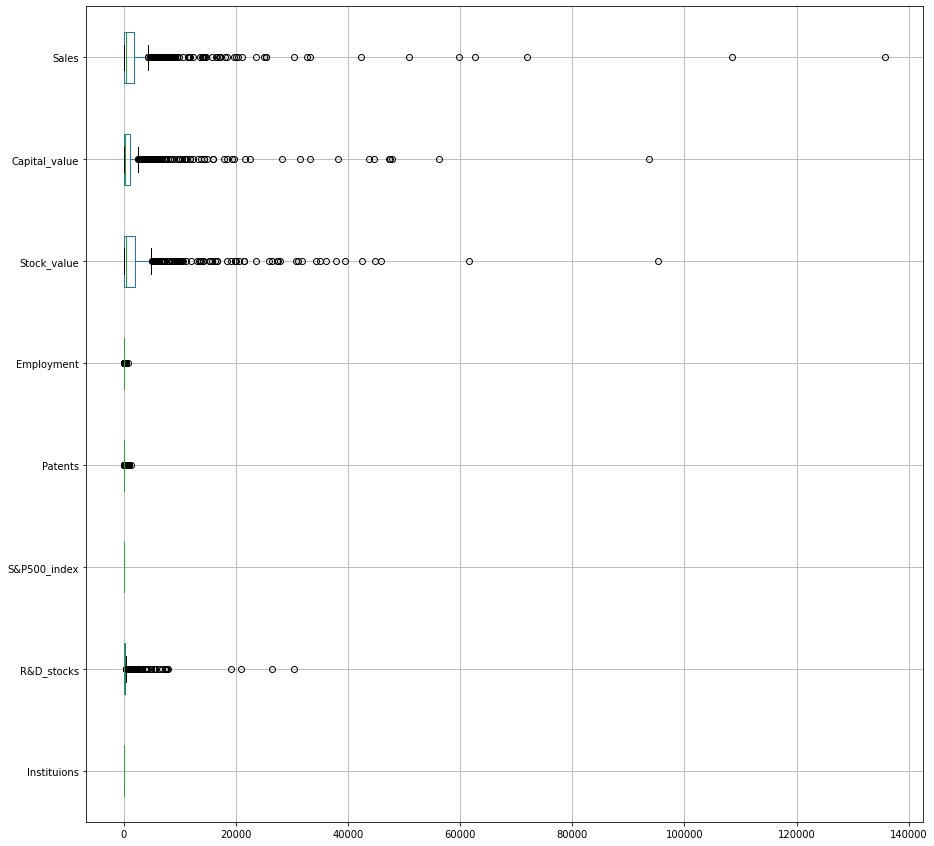

In [18]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
dff.boxplot(vert = 0)
plt.show()

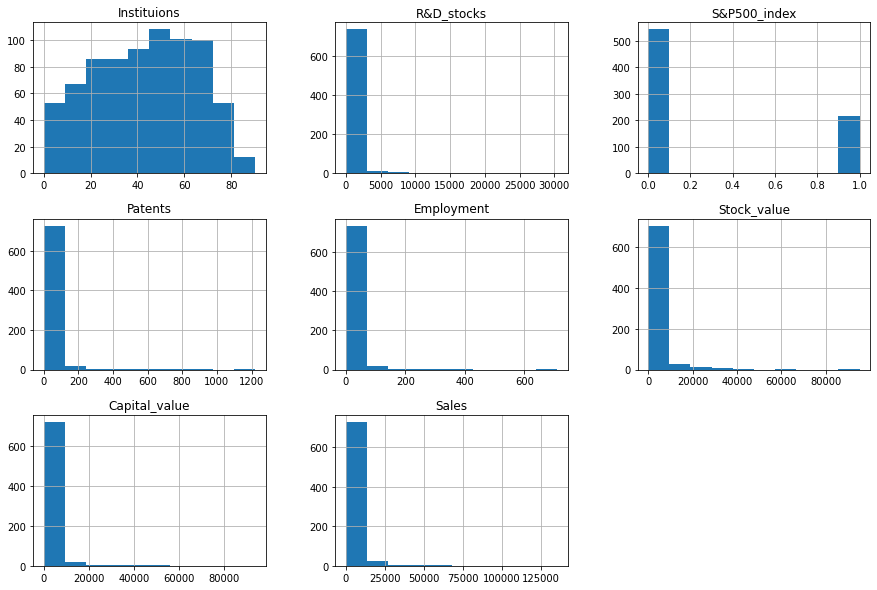

In [19]:
dff.hist(figsize=(15,10));

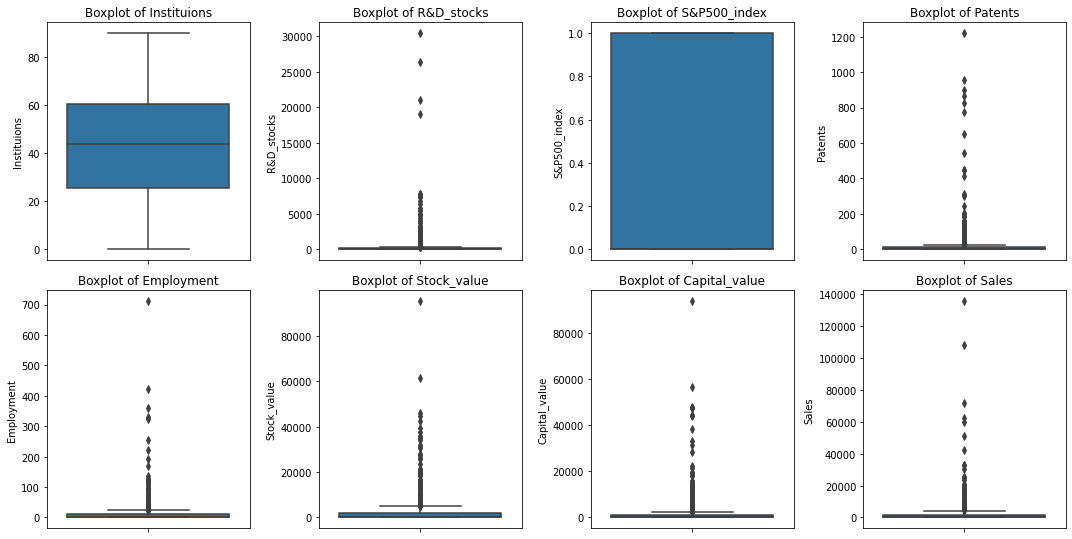

In [20]:
plt.figure(figsize = (15,15))
feature_list = dff.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = dff[feature_list[i]], data = dff)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Bivariate Analysis

In [21]:
cat=[]
num=[]
for i in dff.columns:
    if dff[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

[]
['Instituions', 'R&D_stocks', 'S&P500_index', 'Patents', 'Employment', 'Stock_value', 'Capital_value', 'Sales']


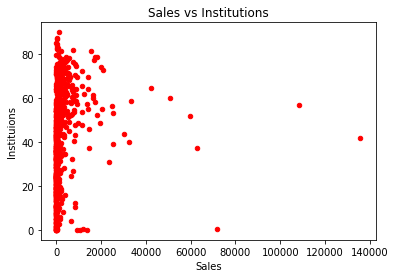

In [22]:
dff.plot(kind='scatter', x='Sales', y='Instituions', color='r');
plt.title('Sales vs Institutions');

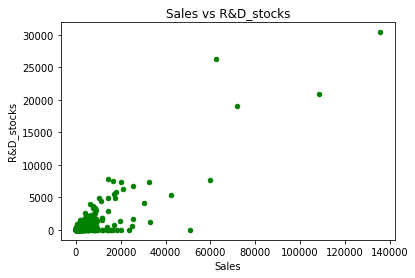

In [23]:
dff.plot(kind='scatter', x='Sales', y='R&D_stocks', color='g');
plt.title('Sales vs R&D_stocks');

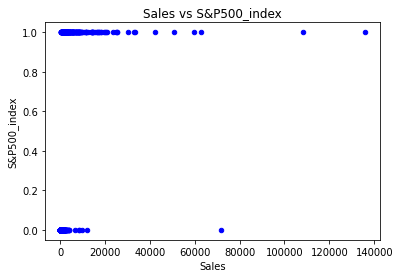

In [24]:
dff.plot(kind='scatter', x='Sales', y='S&P500_index', color='b');
plt.title('Sales vs S&P500_index');

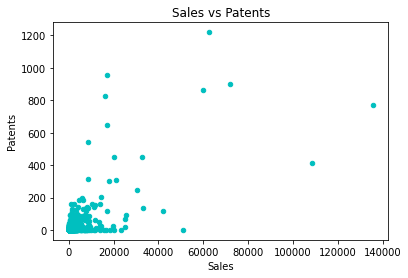

In [25]:
dff.plot(kind='scatter', x='Sales', y='Patents', color='c');
plt.title('Sales vs Patents');

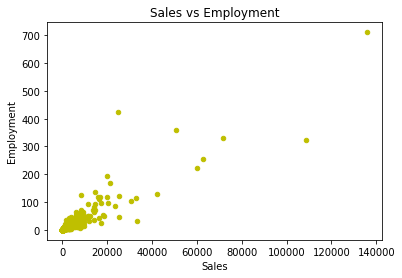

In [26]:
dff.plot(kind='scatter', x='Sales', y='Employment', color='y');
plt.title('Sales vs Employment');

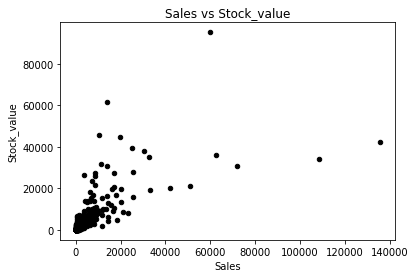

In [27]:
dff.plot(kind='scatter', x='Sales', y='Stock_value', color='black');
plt.title('Sales vs Stock_value');

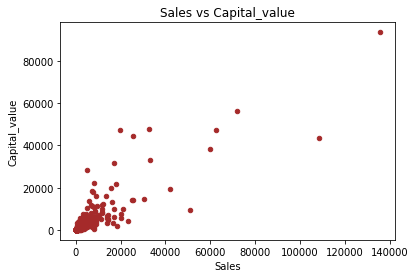

In [28]:
dff.plot(kind='scatter', x='Sales', y='Capital_value', color='brown');
plt.title('Sales vs Capital_value');

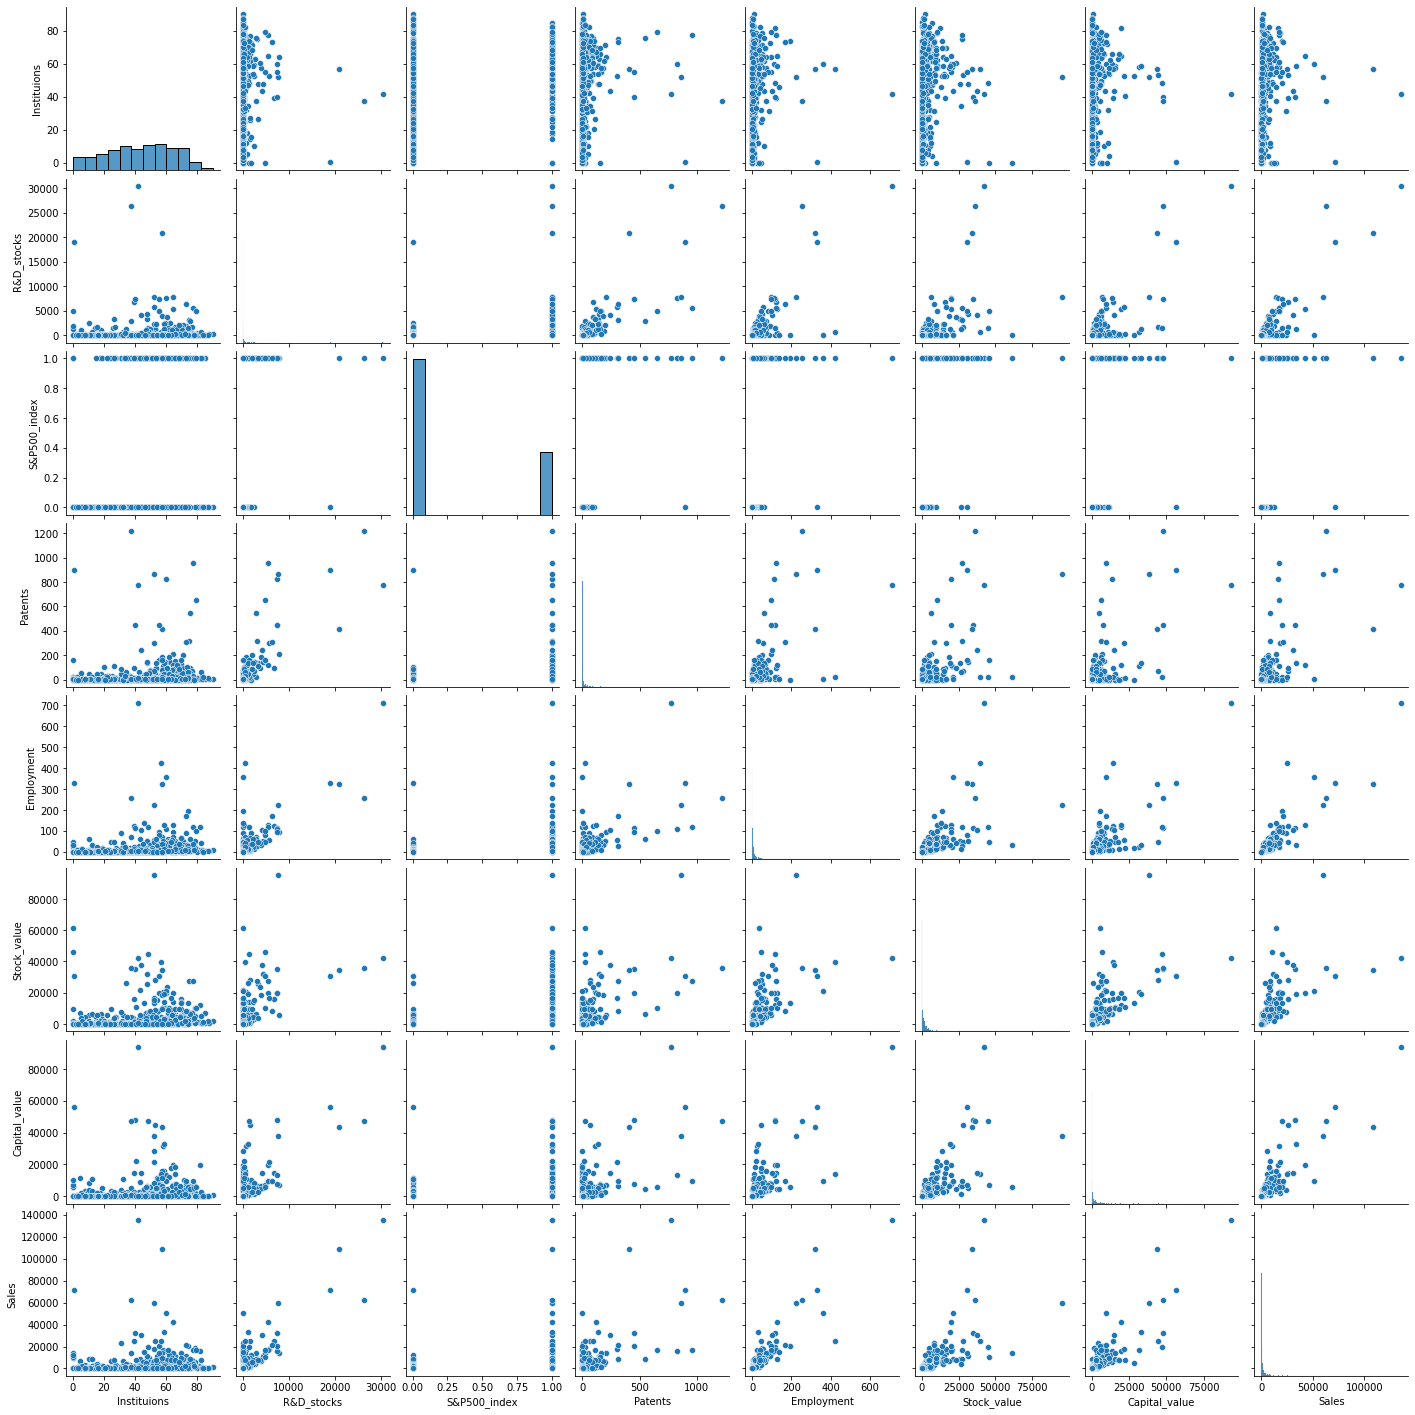

In [29]:
sns.pairplot(dff);

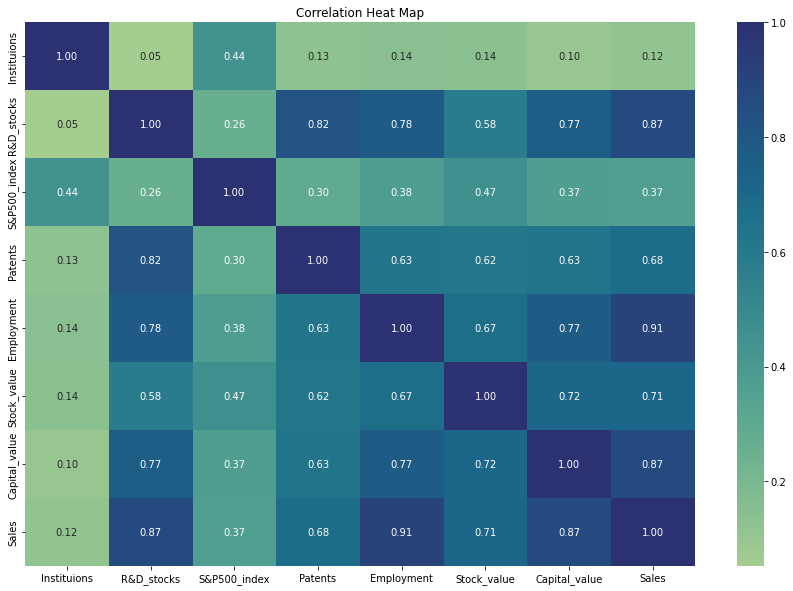

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(dff.corr(),annot=True, fmt = '.2f', cmap = 'crest')
plt.title('Correlation Heat Map');
plt.show()

### 1.2) Impute null values if present? Do you think scaling is necessary in this case?

- there are no null values

#### Outliers removal

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
for column in dff.columns:
    lr,ur=remove_outlier(dff[column])
    dff[column]=np.where(dff[column]>ur,ur,dff[column])
    dff[column]=np.where(dff[column]<lr,lr,dff[column])

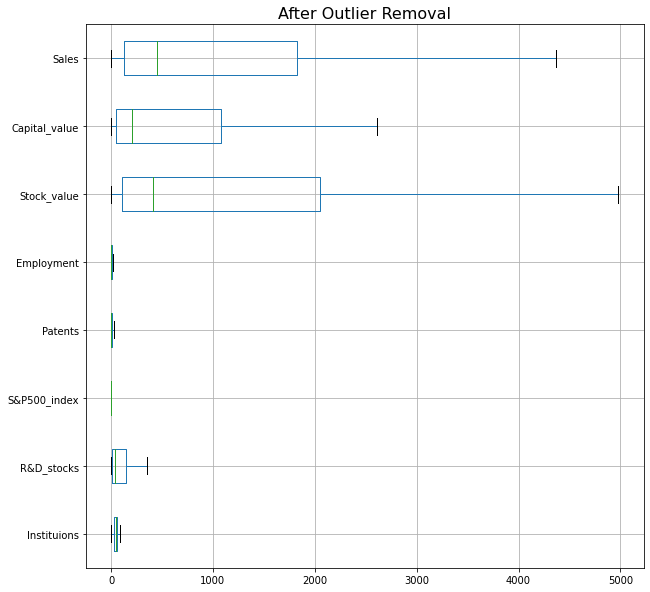

In [33]:
plt.figure(figsize=(10,10))
dff.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [34]:
dff.skew()

Instituions     -0.168071
R&D_stocks       1.162978
S&P500_index     0.949540
Patents          1.162219
Employment       1.186553
Stock_value      1.195849
Capital_value    1.190265
Sales            1.189942
dtype: float64

### 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (30:70). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE. 

#### Splitting the data 70:30

In [35]:
# Copy all the predictor variables into X dataframe
x = dff.drop('Sales', axis=1)

# Copy target into the y dataframe. 
y = dff[['Sales']]

In [36]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [37]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(531, 7) (228, 7) (531, 1) (228, 1)


In [38]:
x.shape

(759, 7)

In [39]:
y.shape

(759, 1)

In [40]:
from sklearn import metrics
y_train.value_counts(normalize=True)

Sales      
4371.988416    0.135593
215.759033     0.003766
658.252907     0.001883
730.631874     0.001883
722.659872     0.001883
                 ...   
141.327022     0.001883
141.325000     0.001883
140.279036     0.001883
138.846985     0.001883
300.926995     0.001883
Length: 459, dtype: float64

In [41]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Instituions    759 non-null    float64
 1   R&D_stocks     759 non-null    float64
 2   S&P500_index   759 non-null    float64
 3   Patents        759 non-null    float64
 4   Employment     759 non-null    float64
 5   Stock_value    759 non-null    float64
 6   Capital_value  759 non-null    float64
 7   Sales          759 non-null    float64
dtypes: float64(8)
memory usage: 47.6 KB


In [42]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_train = scale.fit_transform(x_train)
scaled_test  = scale.transform(x_test)

In [43]:
scaled_test

array([[-0.40760757, -0.40034929, -0.63913071, ..., -0.71417032,
        -0.77096466, -0.71409374],
       [-1.14615849, -0.37621064, -0.63913071, ..., -0.44354777,
        -0.69676859, -0.68316022],
       [ 0.19188949, -0.15369412,  1.56462518, ...,  1.42882883,
         0.41339164,  0.37756348],
       ...,
       [ 0.89913027, -0.77031279, -0.63913071, ..., -0.32042833,
        -0.5841406 , -0.51880452],
       [ 0.8972885 , -0.65198127, -0.63913071, ..., -0.75272772,
        -0.63010358, -0.63401526],
       [ 1.31122695, -0.35110553, -0.63913071, ..., -0.62996864,
        -0.46352212, -0.69733638]])

### Applying Linear Regression

In [44]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][idx]))

The coefficient for Instituions is 0.11609135363276048
The coefficient for R&D_stocks is 0.6120568947187326
The coefficient for S&P500_index is 172.12798009965283
The coefficient for Patents is -5.808956240929047
The coefficient for Employment is 82.43808341024011
The coefficient for Stock_value is 0.20783028524978664
The coefficient for Capital_value is 0.45978979902852246


#### Get the RMSE on train set

In [46]:
print('The coefficient of determination R^2 of the prediction on Train set',lr.score(x_train, y_train).round(3))

The coefficient of determination R^2 of the prediction on Train set 0.935


#### Get the RMSE on test set

In [47]:
print('The coefficient of determination R^2 of the prediction on Test set',lr.score(x_test, y_test).round(3))

The coefficient of determination R^2 of the prediction on Test set 0.922


#### Check Multi-collinearity using VIF

In [48]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

In [49]:
i=0
for column in x.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

Instituions ---> 2.3154535547399826
R&D_stocks ---> 4.7051840690877755
S&P500_index ---> 3.6974672055987146
Patents ---> 4.053367467814531
Employment ---> 8.565227806181197
Stock_value ---> 7.851020206765518
Capital_value ---> 7.901767851899652


### Linear Regression using statsmodels(OLS)

In [50]:
import statsmodels.api as sm

In [51]:
x_train=sm.add_constant(x_train)# This adds the constant term beta0 to the Simple Linear Regression.
x_test=sm.add_constant(x_test)

In [54]:
model = sm.OLS(y_train,x_train).fit()
model

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1067.
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          6.47e-305
Time:                        16:02:08   Log-Likelihood:                -3933.2
No. Observations:                 531   AIC:                             7882.
Df Residuals:                     523   BIC:                             7917.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -20.9972     40.250     -0.522      0.602    -100.069      58.075
Instituions       0.1161      0.910      0.128      0.899      -1.672       1.904
R&D_stocks        0.6121      0.234      2.611      0.009       0.152       1.073
S&P500_index    172.1280     67.100      2.565      0.011      40.310     303.946
Patents          -5.8090      2.793     -2.080      0.038     -11.295      -0.323
Employment       82.4381      4.664     17.675      0.000      73.275      91.601
Stock_value       0.2078      0.023      8.985      0.000       0.162       0.253
Capital_value     0.4598      0.039     11.742      0.000       0.383       0.537
==============================================================================
Omnibus:                      189.932   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1369.342
Skew:                           1.376   Prob(JB):                    4.48e-298
Kurtosis:                      10.370   Cond. No.                     9.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Calculate MSE on train
predicted_train=model.predict(x_train)
mse=metrics.mean_squared_error(y_train,predicted_train)


In [57]:
np.sqrt(mse) #RMSE on train 

398.67714316818916

In [59]:
# Prediction on Test data
y_pred = model.predict(x_test)

In [60]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test

405.03869641452354

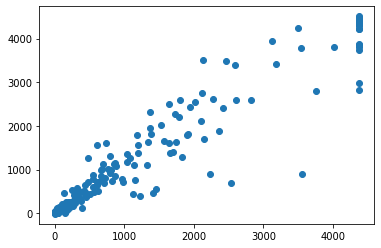

In [61]:
plt.scatter(y_test, y_pred)
plt.show()

In [62]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-21.0) * const + (0.12) * Instituions + (0.61) * R&D_stocks + (172.13) * S&P500_index + (-5.81) * Patents + (82.44) * Employment + (0.21) * Stock_value + (0.46) * Capital_value + 

_______________________________________________________________________________________________________________________________

# Problem 2: Logistic Regression and Linear Discriminant Analysis

## You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions

### 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [216]:
cdf = pd.read_csv('Car_Crash.csv')

In [217]:
cdf.head(2)

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1


In [218]:
#dropping first column -not important
cdf.drop(['Unnamed: 0'], axis=1, inplace=True)

In [219]:
cdf.head(2)

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1


In [220]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [221]:
cdf.shape

(11217, 15)

In [222]:
cdf.isna().sum()  

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

- **injSeverity** has null values

In [223]:
cdf['injSeverity'].unique

<bound method Series.unique of 0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
11212    0.0
11213    2.0
11214    3.0
11215    0.0
11216    0.0
Name: injSeverity, Length: 11217, dtype: float64>

In [224]:
cdf['injSeverity'].value_counts()

3.0    3337
0.0    2734
1.0    2218
2.0    1682
4.0    1101
5.0      68
Name: injSeverity, dtype: int64

In [225]:
cdf.describe(include ='all').round(3).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,10-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405,1406.203,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644,0.479,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.428,18.192,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103,1.057,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.178,5.659,1953.0,1991.0,1995.0,1999.0,2003.0


In [226]:
cdf['injSeverity'].fillna(cdf['injSeverity'].mode()[0], inplace= True)

In [227]:
cdf.isna().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [228]:
cdf['dvcat'].unique()

array(['55+', '25-39', '10-24', '40-54', '1-9km/h'], dtype=object)

In [229]:
cdf['weight'].unique()

array([  27.078     ,   89.627     ,   13.374     , ..., 3179.68799999,
         71.228     ,   10.474     ])

In [230]:
cdf['Survived'].unique()

array(['Not_Survived', 'survived'], dtype=object)

In [231]:
cdf['Survived'].replace({'Not_Survived':0, 'survived':1}, inplace = True)

In [232]:
cdf['Survived'].unique()

array([0, 1], dtype=int64)

In [233]:
cdf['airbag'].unique()

array(['none', 'airbag'], dtype=object)

In [234]:
cdf['airbag'].replace({'none':0, 'airbag':1}, inplace = True)

In [235]:
cdf['seatbelt'].unique()

array(['none', 'belted'], dtype=object)

In [236]:
cdf['seatbelt'].replace({'none': 0, 'belted': 1}, inplace= True)

In [237]:
cdf['sex'].unique()

array(['m', 'f'], dtype=object)

In [238]:
cdf['sex'].replace({'m': 0, 'f': 1}, inplace= True)

In [239]:
cdf['abcat'].unique()

array(['unavail', 'nodeploy', 'deploy'], dtype=object)

In [240]:
cdf['occRole'].unique()

array(['driver', 'pass'], dtype=object)

In [241]:
cdf['occRole'].replace({'driver': 0, 'pass': 1}, inplace= True)

In [242]:
cdf['caseid'].unique()

array(['2:13:2', '2:17:1', '2:79:1', ..., '82:101:2', '82:107:1',
       '82:110:2'], dtype=object)

In [243]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int64  
 3   airbag       11217 non-null  int64  
 4   seatbelt     11217 non-null  int64  
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int64  
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  int64  
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(9), object(3)
memory usage: 1.3+ MB


### Univariate Analysis

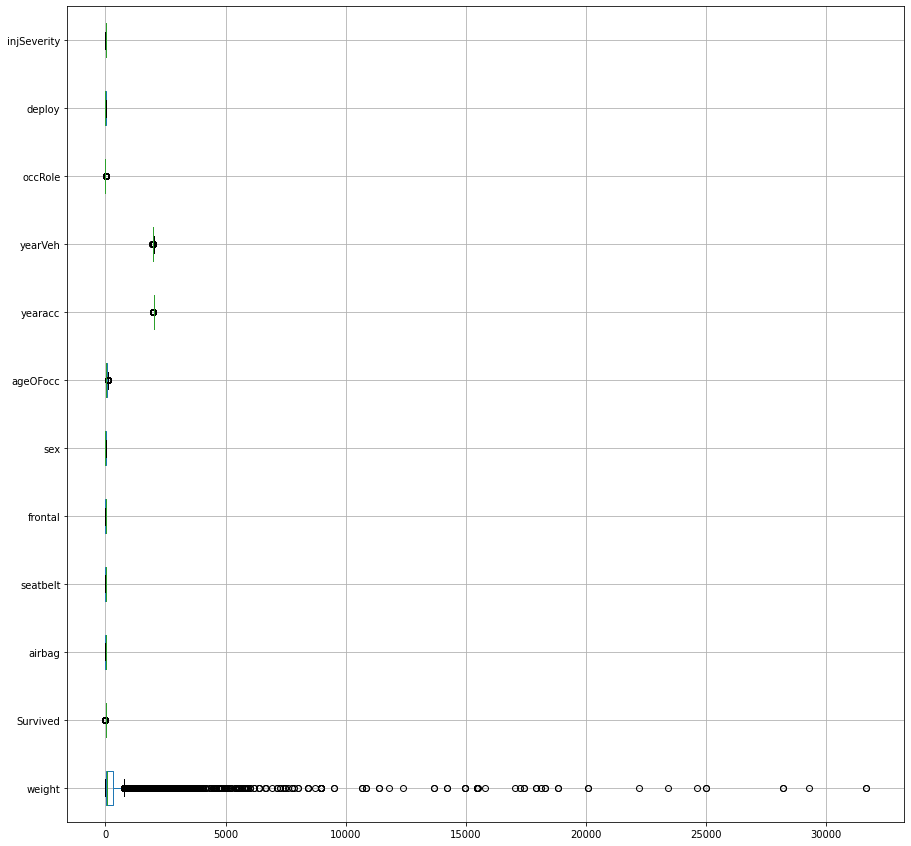

In [244]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
cdf.boxplot(vert = 0)
plt.show()

In [245]:
cdf.skew()

weight         11.115386
Survived       -2.573960
airbag         -0.537519
seatbelt       -0.871645
frontal        -0.601667
sex             0.157231
ageOFocc        0.911059
yearacc        -1.671687
yearVeh        -1.026743
occRole         1.375262
deploy          0.454813
injSeverity     0.021729
dtype: float64

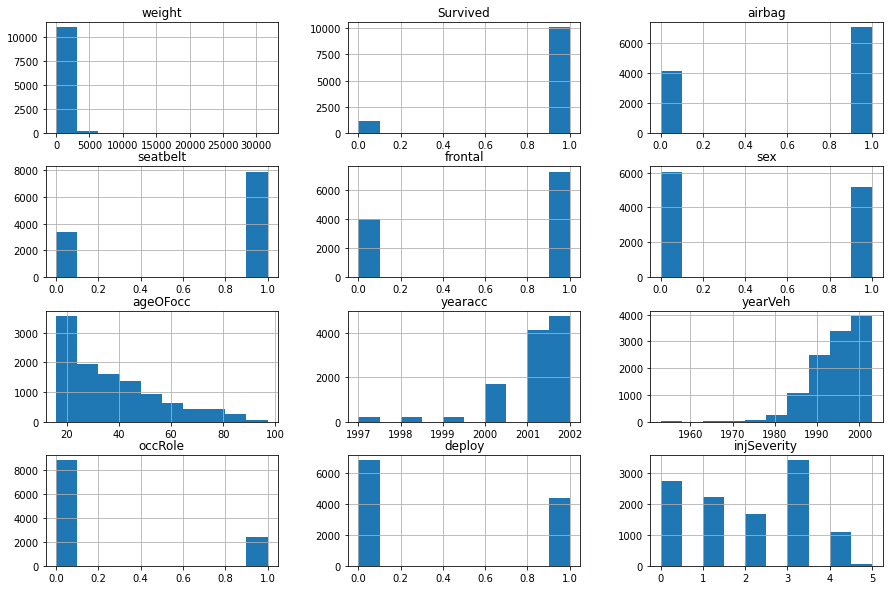

In [246]:
cdf.hist(figsize=(15,10));

In [247]:
cat=[]
num=[]
for i in cdf.columns:
    if cdf[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['dvcat', 'abcat', 'caseid']
['weight', 'Survived', 'airbag', 'seatbelt', 'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh', 'occRole', 'deploy', 'injSeverity']


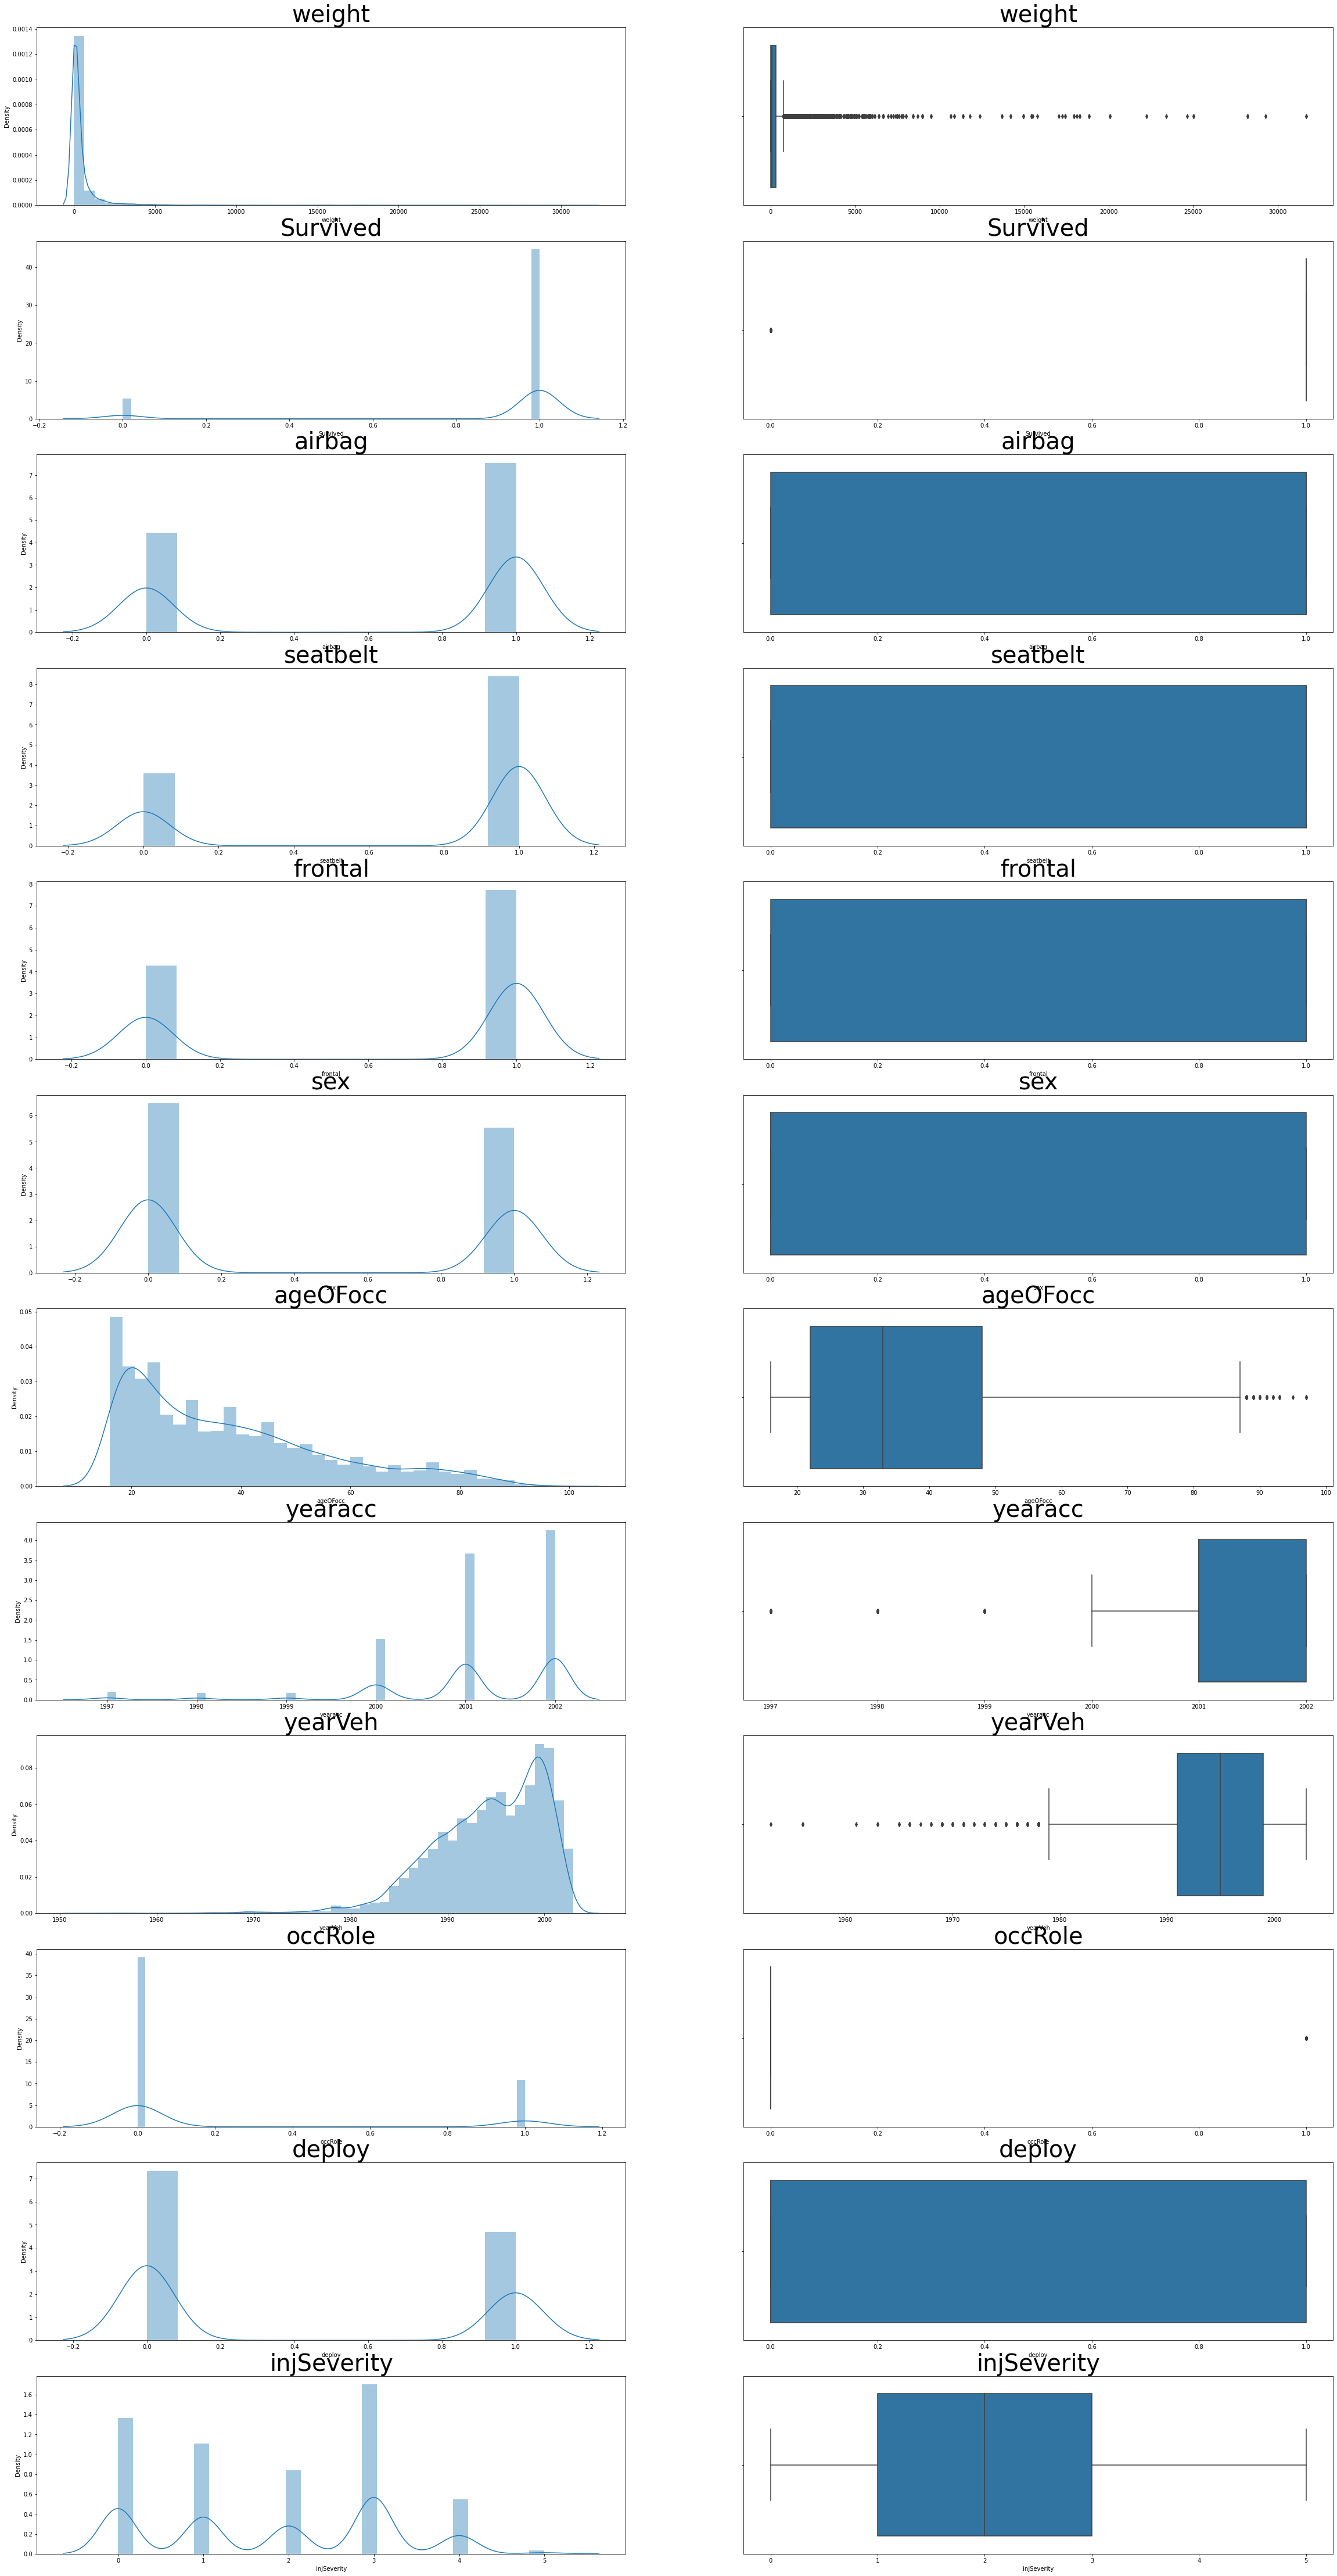

In [248]:
fig, axes = plt.subplots(nrows=12,ncols=2,figsize=(40,80))
for i,j in zip(num,axes):
    a=sns.distplot(cdf[i],ax=j[0])
    a.set_title(i,fontsize=40)
    a = sns.boxplot(cdf[i],ax=j[1])
    a.set_title(i,fontsize=40)

### Bivariate and Multivariate Analysis

In [249]:
cdf.corr()

,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
weight,1.000000,0.091640,-0.003574,0.078739,0.000659,0.006471,-0.040111,0.056892,-0.015226,-0.000219,-0.065783,-0.220659
Survived,0.091640,1.000000,0.139679,0.206467,0.107990,0.046499,-0.135473,0.549885,0.165096,-0.023460,0.054346,-0.517637
airbag,-0.003574,0.139679,1.000000,0.157501,-0.050272,0.092886,0.025109,0.181478,0.766181,-0.086011,0.611983,-0.124394
seatbelt,0.078739,0.206467,0.157501,1.000000,-0.066590,0.117071,0.066066,0.149208,0.180534,-0.047712,0.044132,-0.283063
frontal,0.000659,0.107990,-0.050272,-0.066590,1.000000,-0.055639,-0.048856,0.059768,-0.024267,-0.033721,0.260388,-0.053709
sex,0.006471,0.046499,0.092886,0.117071,-0.055639,1.000000,0.063575,0.025957,0.097390,0.116228,0.036143,0.021284
ageOFocc,-0.040111,-0.135473,0.025109,0.066066,-0.048856,0.063575,1.000000,-0.072271,-0.002070,-0.052485,-0.009556,0.123495
yearacc,0.056892,0.549885,0.181478,0.149208,0.059768,0.025957,-0.072271,1.000000,0.247743,-0.018217,0.091252,-0.300495
yearVeh,-0.015226,0.165096,0.766181,0.180534,-0.024267,0.097390,-0.002070,0.247743,1.000000,-0.018416,0.452448,-0.138475
occRole,-0.000219,-0.023460,-0.086011,-0.047712,-0.033721,0.116228,-0.052485,-0.018217,-0.018416,1.000000,-0.084323,0.018918


In [250]:
cdf.cov()

,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
weight,1.977407e+06,39.538440,-2.427227,50.754708,0.443452,4.535851,-1026.128991,84.546094,-121.156698,-0.126992,-45.103025,-427.336576
Survived,3.953844e+01,0.094139,0.020695,0.029038,0.015865,0.007112,-0.756185,0.178301,0.286642,-0.002966,0.008130,-0.218732
airbag,-2.427227e+00,0.020695,0.233184,0.034863,-0.011624,0.022359,0.220582,0.092612,2.093616,-0.017113,0.144089,-0.082727
seatbelt,5.075471e+01,0.029038,0.034863,0.210122,-0.014616,0.026751,0.550940,0.072281,0.468288,-0.009011,0.009863,-0.178699
frontal,4.434517e-01,0.015865,-0.011624,-0.014616,0.229278,-0.013280,-0.425586,0.030244,-0.065752,-0.006653,0.060792,-0.035419
sex,4.535851e+00,0.007112,0.022359,0.026751,-0.013280,0.248487,0.576538,0.013674,0.274715,0.023872,0.008785,0.014612
ageOFocc,-1.026129e+03,-0.756185,0.220582,0.550940,-0.425586,0.576538,330.964474,-1.389464,-0.213142,-0.393423,-0.084764,3.094151
yearacc,8.454609e+01,0.178301,0.092612,0.072281,0.030244,0.013674,-1.389464,1.116838,1.481539,-0.007932,0.047020,-0.437354
yearVeh,-1.211567e+02,0.286642,2.093616,0.468288,-0.065752,0.274715,-0.213142,1.481539,32.020936,-0.042937,1.248330,-1.079169
occRole,-1.269921e-01,-0.002966,-0.017113,-0.009011,-0.006653,0.023872,-0.393423,-0.007932,-0.042937,0.169770,-0.016940,0.010735


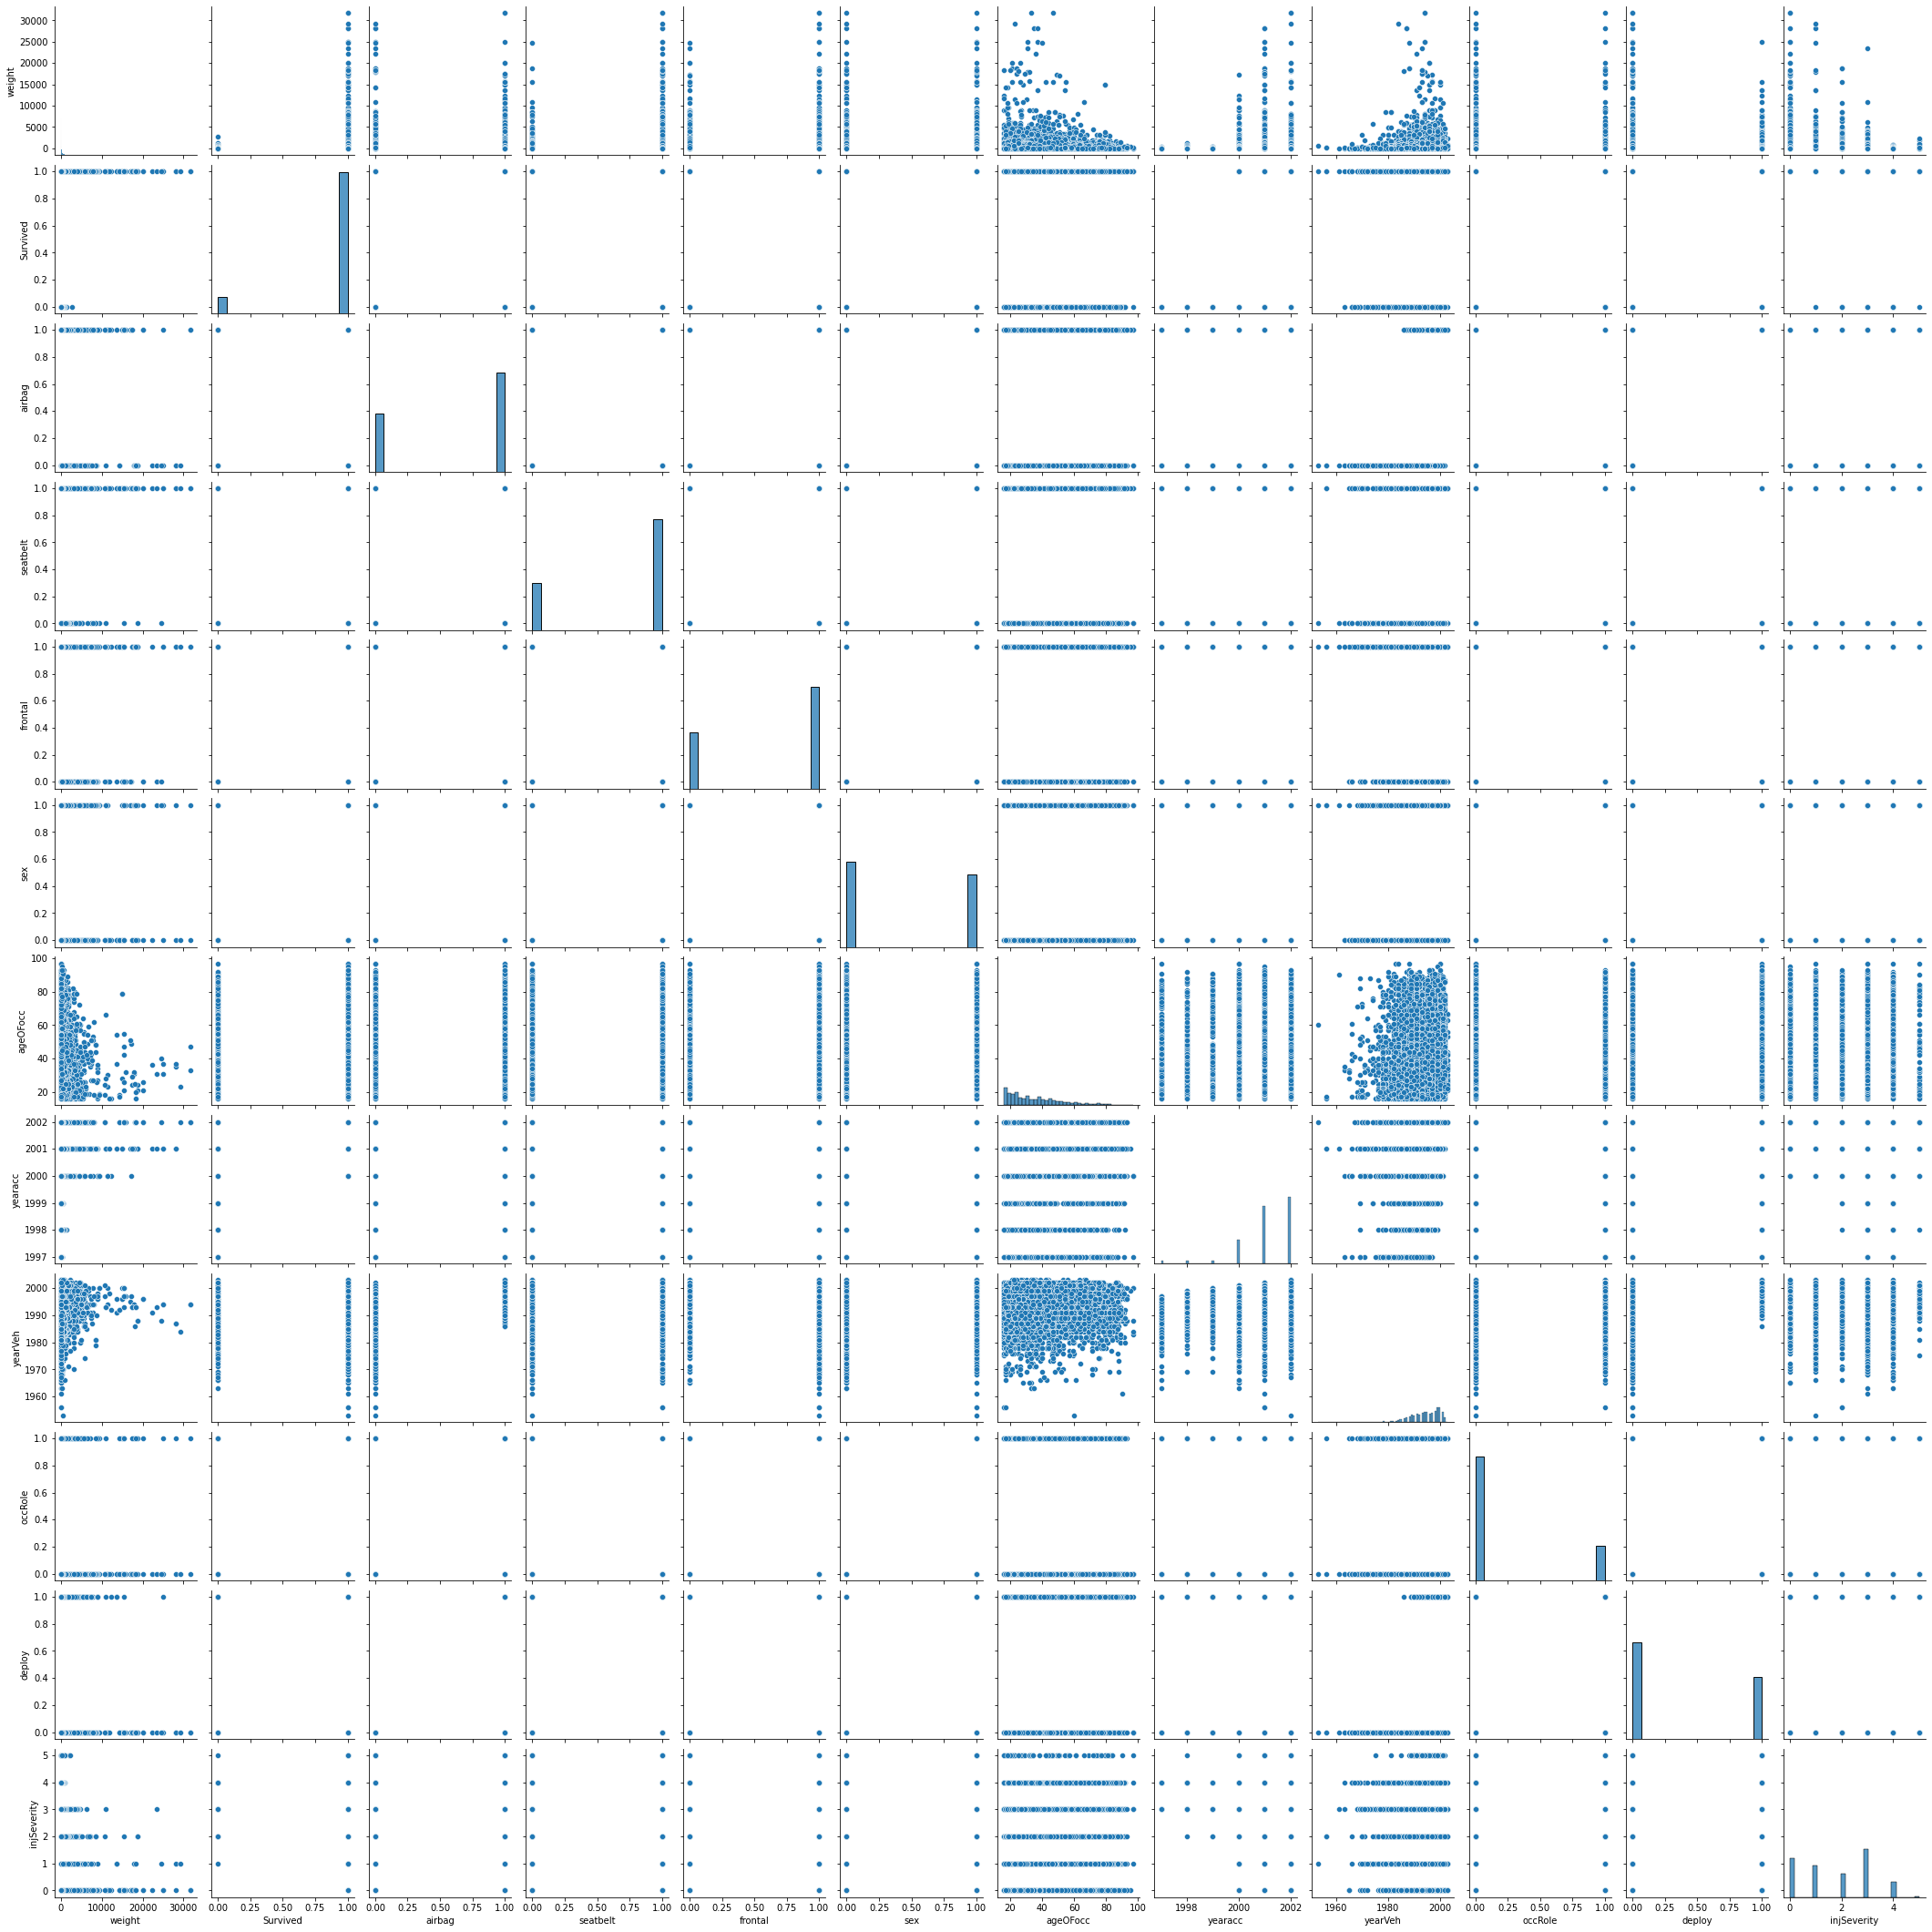

In [251]:
sns.pairplot(cdf);

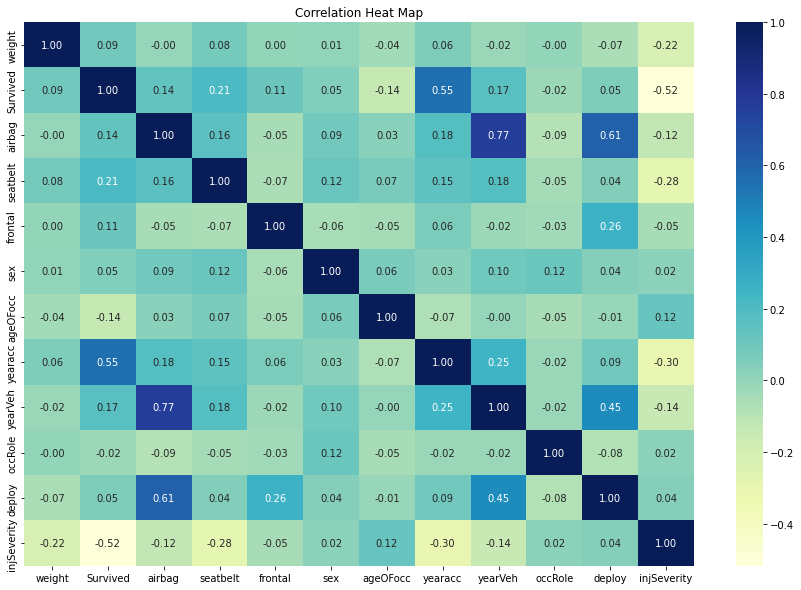

In [252]:
plt.figure(figsize=(15,10))
sns.heatmap(cdf.corr(),annot=True, fmt = '.2f', cmap = 'YlGnBu')
plt.title('Correlation Heat Map');
plt.show()

### Outlier Removal

In [253]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [254]:
lr,ur=remove_outlier(cdf['weight'])
print('Lower Range :',lr,'\nUpper Range :',ur)
cdf['weight']=np.where(cdf['weight']>ur,ur,cdf['weight'])
cdf['weight']=np.where(cdf['weight']<lr,lr,cdf['weight'])

Lower Range : -415.353999997256 
Upper Range : 767.7019999951584


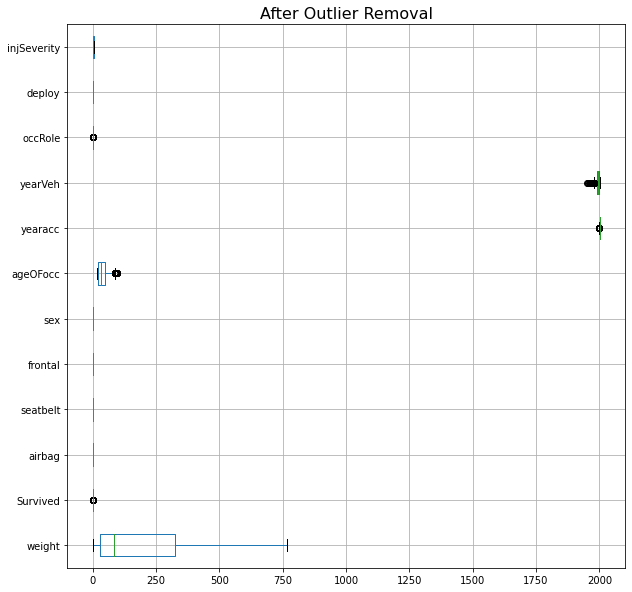

In [255]:
plt.figure(figsize=(10,10))
cdf.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

#### Label Encoding

In [256]:
from sklearn.preprocessing import LabelEncoder

In [257]:
lenc = LabelEncoder()

In [258]:
cdf['dvcat']=lenc.fit_transform(cdf['dvcat'])

In [259]:
cdf['abcat']=lenc.fit_transform(cdf['abcat'])

In [260]:
cdf.head(2)

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,4,27.078,0,0,0,1,0,32,1997,1987.0,2,0,0,4.0,2:13:2
1,2,89.627,0,1,1,0,1,54,1997,1994.0,1,0,0,4.0,2:17:1


In [261]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int32  
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int64  
 3   airbag       11217 non-null  int64  
 4   seatbelt     11217 non-null  int64  
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int64  
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  int32  
 11  occRole      11217 non-null  int64  
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int32(2), int64(9), object(1)
memory usage: 1.2+ MB


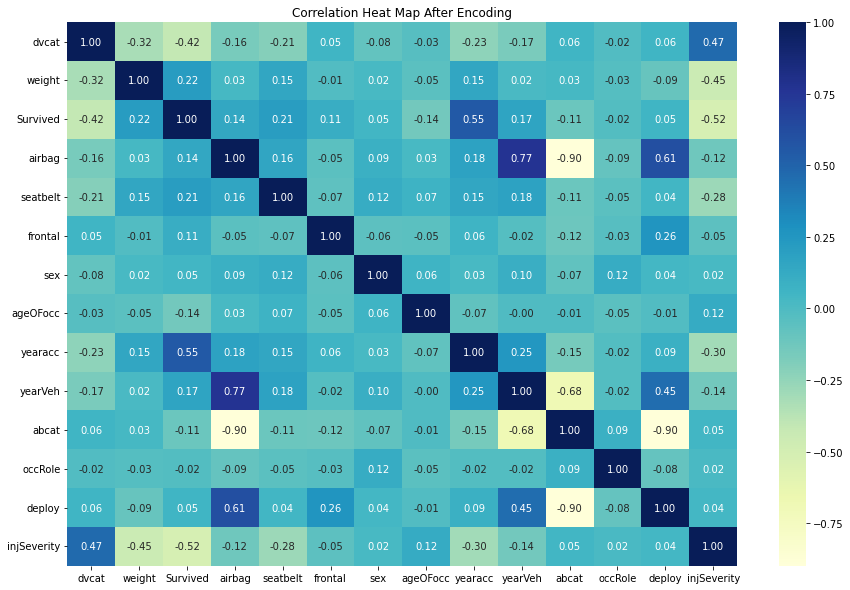

In [263]:
plt.figure(figsize=(15,10))
sns.heatmap(cdf.corr(),annot=True, fmt = '.2f', cmap = 'YlGnBu')
plt.title('Correlation Heat Map After Encoding');
plt.show()

### Creating Train_test data and Splitting the data - 70:30

In [264]:
cdf.drop(['caseid'],axis = 1,inplace= True)

In [265]:
x = cdf.drop(columns = ['Survived'])
y = cdf['Survived']

In [266]:
#splitting dat into train and test - 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 1,test_size = 0.30 )

In [267]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7851, 13) (3366, 13) (7851,) (3366,)


In [268]:
from sklearn import metrics
y_train.value_counts(normalize=True)

1    0.898484
0    0.101516
Name: Survived, dtype: float64

### Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_train_predict = logreg.predict(x_train)

In [270]:
from sklearn.metrics import classification_report,confusion_matrix

In [271]:
## Performance Matrix on train data set
logreg_train_predict = logreg.predict(x_train)
logreg_train_recall = metrics.recall_score(y_train, logreg_train_predict)
print(logreg_train_recall)
print(metrics.confusion_matrix(y_train, logreg_train_predict))
print(metrics.classification_report(y_train, logreg_train_predict))

0.9916359512333428
[[ 705   92]
 [  59 6995]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       797
           1       0.99      0.99      0.99      7054

    accuracy                           0.98      7851
   macro avg       0.95      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



AxesSubplot(0.125,0.125;0.62x0.755)


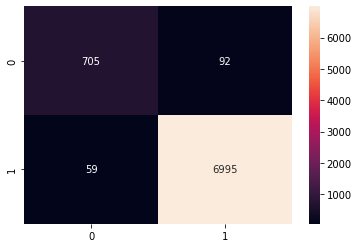

In [272]:
print(sns.heatmap(confusion_matrix(y_train,logreg_train_predict),annot=True , fmt="2g"));

AUC: 0.987


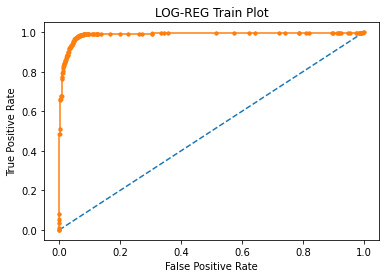

In [273]:
from sklearn.metrics import roc_auc_score,roc_curve
# AUC and ROC curve for training data set
probs = logreg.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('LOG-REG Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [274]:
## Performance Matrix on test data set
logreg_test_predict = logreg.predict(x_test)
logreg_test_recall = metrics.recall_score(y_test, logreg_test_predict)
print(logreg_test_recall)
print(metrics.confusion_matrix(y_test, logreg_test_predict))
print(metrics.classification_report(y_test, logreg_test_predict))

0.992289641300704
[[ 339   44]
 [  23 2960]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       383
           1       0.99      0.99      0.99      2983

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



AxesSubplot(0.125,0.125;0.62x0.755)


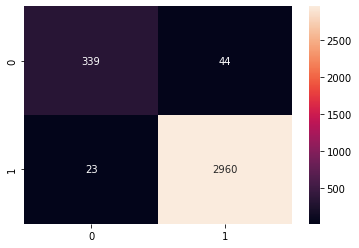

In [275]:
print(sns.heatmap(confusion_matrix(y_test,logreg_test_predict),annot=True , fmt="2g"))

AUC: 0.988


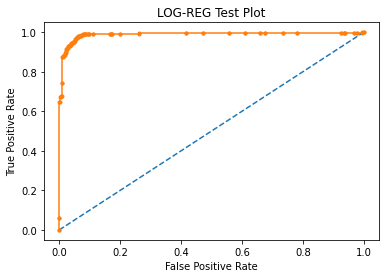

In [276]:
# AUC and ROC curve for test data set
probs = logreg.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('LOG-REG Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [277]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(logreg_train_predict, y_train))
print(mean_squared_error(logreg.predict(x_test), y_test))

0.019233218698255
0.01990493166963755


In [292]:
# Accuracy - Train Data
logreg.score(x_train, y_train).round(2)

0.98

In [293]:
# Accuracy - Test Data
logreg.score(x_test, y_test).round(2)

0.98

In [279]:
## Create a dataframe with all recalls
data = {'Train Recall':logreg_train_recall,'Test Recall':logreg_test_recall}
recall_df = pd.DataFrame(data,index=['LogReg_Model'])
recall_df

,Train Recall,Test Recall
LogReg_Model,0.991636,0.99229


### Applying LDA

In [280]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [281]:
## Performance Matrix on train data set
LDA_train_predict = LDA.predict(x_train)
LDA_train_recall = metrics.recall_score(y_train, LDA_train_predict)
print(LDA_train_recall)
print(metrics.confusion_matrix(y_train, LDA_train_predict))
print(metrics.classification_report(y_train, LDA_train_predict))

0.9900765523107457
[[ 547  250]
 [  70 6984]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.77       797
           1       0.97      0.99      0.98      7054

    accuracy                           0.96      7851
   macro avg       0.93      0.84      0.88      7851
weighted avg       0.96      0.96      0.96      7851



AUC: 0.969


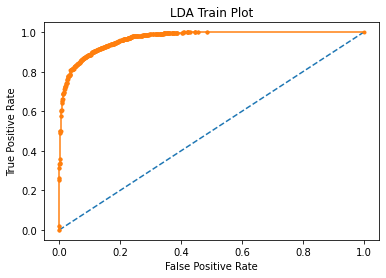

In [282]:
# AUC and ROC curve for training data set
probs = LDA.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('LDA Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

AxesSubplot(0.125,0.125;0.62x0.755)


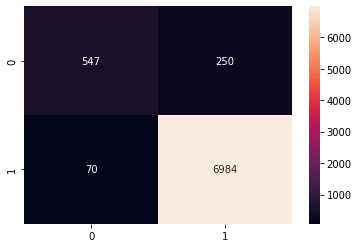

In [284]:
print(sns.heatmap(confusion_matrix(y_train,LDA_train_predict),annot=True , fmt="2g"));

In [283]:
## Performance Matrix on test data set
LDA_test_predict = LDA.predict(x_test)
LDA_test_recall = metrics.recall_score(y_test, LDA_test_predict)
print(LDA_test_recall)
print(metrics.confusion_matrix(y_test, LDA_test_predict))
print(metrics.classification_report(y_test, LDA_test_predict))

0.9916191753268522
[[ 276  107]
 [  25 2958]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       383
           1       0.97      0.99      0.98      2983

    accuracy                           0.96      3366
   macro avg       0.94      0.86      0.89      3366
weighted avg       0.96      0.96      0.96      3366



AUC: 0.966


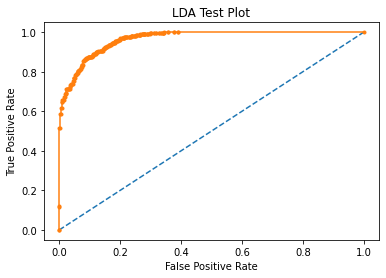

In [285]:
# AUC and ROC curve for test data set
probs = LDA.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('LDA Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

AxesSubplot(0.125,0.125;0.62x0.755)


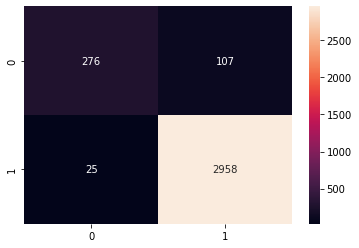

In [287]:
print(sns.heatmap(confusion_matrix(y_test,LDA_test_predict),annot=True , fmt="2g"));

In [286]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(LDA_train_predict, y_train))
print(mean_squared_error(LDA.predict(x_test), y_test))

0.040759138963189404
0.0392156862745098


In [288]:
LDA.score(x_train, y_train)

0.9592408610368106

In [289]:
## Create a dataframe with all recalls
data = {'Train Recall':LDA_train_recall,'Test Recall':LDA_test_recall}
recall_df = recall_df.append(pd.Series(data,name='LDA_Model'))
recall_df

,Train Recall,Test Recall
LogReg_Model,0.991636,0.992290
LDA_Model,0.990077,0.991619


In [294]:
# Accuracy - Train Data
LDA.score(x_train, y_train).round(2)

0.96

In [295]:
# Accuracy - Test Data
LDA.score(x_test, y_test).round(2)

0.96